# Clean and Analyze Data
## Gather

In [1]:
import numpy as np
import pandas as pd
import tweepy
import requests

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.txt')

In [3]:
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
import json
data_aug = pd.read_json('tweet_json.txt',lines=True)

## Asses
### Asses manually

In [6]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None








*As we can see,in this `twitter_archive_enhanced` table, there are so many colums showing 'NaN', we need to find out the reason and decide wheter to use them or not.*

*And for the column 'timestamp', we need to delete with the last 5 chars, because I cant see any meaning from them.*



In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


*'image_predictions' table seems to be perfect.*

In [8]:
data_aug.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


*In this `data_aug`table, we need to abstract the columns we want. Let's say coulmn 'favorite_count' and 'retweet_count'*

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### Asses by coding

In [9]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*The column 'timestamp' should be datetime type.*

*Remove the column 'expanded_urls', we dont need them.*

In [10]:
twitter_archive_enhanced[twitter_archive_enhanced.in_reply_to_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


*We should not use those replies whose `in_reply_to_status_id` is not null since there are too many NaN values*

*For the column 'name', some of them are 'None' but not NaN, we will just leave them since name is not a big deal*

**For the last four columns, it should be just one column saying the dogs'class.This problem belongs to tidiness**

In [11]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


*We should not use those tweets whose `retweeted_status_id` is not null since we only care about unretweeted twitters*

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.p1_conf.sort_values()

38      0.044333
136     0.055379
1093    0.059033
1370    0.063152
246     0.070076
250     0.071124
145     0.071536
680     0.072885
701     0.081101
1831    0.082489
18      0.086502
109     0.088530
568     0.088540
301     0.089165
1627    0.090341
1503    0.090341
954     0.090508
277     0.096063
2074    0.097049
664     0.097232
789     0.097500
515     0.098283
1664    0.099804
731     0.100499
1723    0.100896
1037    0.105171
247     0.107317
876     0.107948
866     0.110587
1245    0.111493
          ...   
76      0.999091
1988    0.999120
2045    0.999201
863     0.999223
1872    0.999281
1548    0.999306
95      0.999335
611     0.999365
1711    0.999403
512     0.999484
168     0.999614
107     0.999647
1796    0.999715
1455    0.999823
1687    0.999828
1725    0.999833
331     0.999834
1014    0.999837
594     0.999846
475     0.999876
865     0.999885
45      0.999888
1447    0.999916
242     0.999924
230     0.999945
1372    0.999953
149     0.999956
1229    0.9999

*The table `image_predictions`is perfect, we dont need to do anything about it.*

**However, since the size of table `image_predictions` is different with the size of `twitter_archive_enhanced`, we need to make sure those twitters are all before date  8-1-2017**

In [15]:
data_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

*This table is quite noisy. However, fortunatly the few features we care about are just 'favorite_count' and 'retweet_count'*

*To merge several tables, we need to rename 'id' as 'tweet_id' for consistence*

#### Quality
##### `twitter_archive_enhanced` 
- We need to transfer datatype of column 'timestamp' from object to datetime with utc='true'
- Remove the column 'expanded_urls', we dont need them
- For the column 'name', some of them are 'None' but not NaN, we will just delete them since we dont need them for analysis in the future
- We should not use those replies whose 'in_reply_to_status_id' is not null since there are too many NaN values
- We should not use those tweets whose 'retweeted_status_id' is not null since we only care about unretweeted twitters

##### `image_predictions` 
- Since the size of table `image_predictions` is different with the size of `twitter_archive_enhanced`, we need to make sure those twitters in table `twitter_archive_enhanced` are all before date  8-1-2017
- Since we only want twitters with images, we need to merge those tables by 'inner'

##### `data_aug` 
- To merge several tables, we need to rename 'id' as 'tweet_id' for consistence
- We need to transfer datatype of column 'tweet_id' from int to string

#### Tidiness
- We need to combine such three tables to one table on feature 'tweet_id'
- For the last four columns in table `twitter_archive_enhanced`, they should be just one column saying the dogs' class


## Clean

In [16]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
data_aug_clean = data_aug.copy()

#### Problem One
We need to transfer datatype of column 'timestamp' in table `twitter_archive_enhanced` from object to datetime
##### Definition
By using pd.to_datetime

##### Code

In [17]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp,utc='true')

##### Test

In [18]:
twitter_archive_enhanced_clean.timestamp.sample(5)

919    2016-07-22 16:28:07+00:00
1331   2016-03-04 03:13:11+00:00
622    2016-11-08 20:00:55+00:00
213    2017-04-11 00:24:08+00:00
995    2016-06-30 02:45:28+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

#### Problem Two
We need to transfer datatype of column 'tweet_id' from int to string
##### Definition
By using astype.

##### Code

In [22]:
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
data_aug_clean.id = data_aug_clean.id.astype(str)

##### Test

In [23]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [25]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [24]:
data_aug_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null object
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

#### Problem Three
We dont need column 'expanded_urls' in table `twitter_archive_enhanced`
##### Definition
Remove the column 'expanded_urls'

##### Code

In [26]:
twitter_archive_enhanced_clean.drop(columns={'expanded_urls'},inplace=True)

##### Test

In [27]:
list(twitter_archive_enhanced_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Problem Four
For the column 'name' in table `twitter_archive_enhanced`, some of them are 'None' but not NaN. 
##### Definition
We will just delete them since we dont need them for analysis in the future

##### Code

In [28]:
twitter_archive_enhanced_clean.drop(columns=['name'],inplace=True)

##### Test

In [29]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'rating_numerator', 'rating_denominator',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Problem Five
We should not use those replies whose 'in_reply_to_status_id' in table `twitter_archive_enhanced` is not null since there are too many NaN values
##### Definition
We will just delete them whose 'in_reply_to_status_id' is not null and delete that column.

##### Code

In [30]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.in_reply_to_status_id.isnull()]
twitter_archive_enhanced_clean.drop(columns={'in_reply_to_status_id','in_reply_to_user_id'},inplace=True)

##### Test

In [31]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2278 non-null object
timestamp                     2278 non-null datetime64[ns, UTC]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(8)
memory usage: 249.2+ KB


#### Problem Six
We should not use those tweets whose 'retweeted_status_id' is not null since we only care about unretweeted twitters
##### Definition
We will just delete them whose 'retweeted_status_id' is not null and delete that column.

##### Code

In [32]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]
twitter_archive_enhanced_clean.drop(columns={'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'},inplace=True)

##### Test

In [33]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB



#### Problem Seven
Since the size of table `image_predictions` is different with the size of `twitter_archive_enhanced`, we need to make sure those twitters in table `twitter_archive_enhanced` are all before date  8-1-2017
##### Definition
Filter column 'timestamp' in table `twitter_archive_enhanced`

##### Code

In [34]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 180.2+ KB


In [36]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,None,None,None,None


In [37]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.timestamp >= '8/2/2017']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo


*As we can see there are not any twitters posted after date '8/2/2017' in table `twitter_archive_enhanced_clean`. That's great.*

##### Test

We dont need to do test for this problem

#### Problem Eight
To merge several tables, we need to rename 'id' in table `data_aug` as 'tweet_id' for consistence
##### Definition
Use df.rename

##### Code

In [38]:
data_aug_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [39]:
data_aug_clean.rename(columns={'id':'tweet_id'},inplace=True)

##### Test

In [40]:
list(data_aug_clean)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

#### Now we need to make the messy data clean


#### Tininess One
There are several tables that can be combined.
##### Definition
Merge such three tables to one table on feature 'tweet_id', and we choose 'inner merge' for that `image_predictions_clean` may contain some pictures in the replies or retweet and the method we use is 'inner' since there are some twitters not having pictures.

##### Code

In [41]:
mid_table = pd.merge(image_predictions_clean,twitter_archive_enhanced_clean,on='tweet_id',how='inner')

In [42]:
total_twitter = pd.merge(mid_table,data_aug_clean[['favorite_count','retweet_count','tweet_id']],on='tweet_id',how='inner')

##### Test

In [43]:
total_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971

In [44]:
total_twitter.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,favorite_count,retweet_count
1018,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,...,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,10,10,None,None,pupper,None,8738,2584
1643,819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,12,10,None,None,None,None,7982,1377
1441,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,0.973841,True,collie,0.025188,True,Border_collie,...,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",10,10,None,None,None,None,10852,3149
843,696886256886657024,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,1,kuvasz,0.383941,True,golden_retriever,0.289085,True,dingo,...,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,12,10,None,None,None,None,5285,2001
1409,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,11,10,doggo,None,None,None,15351,4598


#### Tininess Problem Two
For the last four columns in table `twitter_archive_enhanced`, they should be just one column saying the dogs' class
##### Definition
Use pd.melt

##### Code

In [45]:
list(total_twitter)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorite_count',
 'retweet_count']

In [46]:
temp_df = pd.melt(total_twitter,id_vars=['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','timestamp','source',\
                               'text','rating_numerator','rating_denominator','favorite_count','retweet_count'],var_name='class',value_name='Boolean')

In [47]:
temp_df = temp_df[temp_df.Boolean != 'None']

In [48]:
temp_df['class'].sample(5)

1530     doggo
1713     doggo
4827    pupper
4497    pupper
1653     doggo
Name: class, dtype: object

In [49]:
final_twitter = pd.merge(total_twitter,temp_df[['class','tweet_id']],on='tweet_id',how='left')

In [50]:
final_twitter.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

In [51]:
final_twitter.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,class
134,668507509523615744,https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True,2015-11-22 19:13:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,10,10,343,115,NaN
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,2015-11-19 18:13:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,7,10,488,232,NaN
824,694329668942569472,https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg,1,boxer,0.990060,True,bull_mastiff,0.007436,True,Saint_Bernard,0.001617,True,2016-02-02 01:21:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grady. He's very hungry. Too bad no one c...,9,10,2189,567,pupper
605,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False,2015-12-25 00:00:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is patiently waiting to scare the ...,10,10,4252,1753,pupper
469,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False,2015-12-11 03:21:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,1,10,6033,2724,NaN


In [52]:
final_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 20 columns):
tweet_id              1981 non-null object
jpg_url               1981 non-null object
img_num               1981 non-null int64
p1                    1981 non-null object
p1_conf               1981 non-null float64
p1_dog                1981 non-null bool
p2                    1981 non-null object
p2_conf               1981 non-null float64
p2_dog                1981 non-null bool
p3                    1981 non-null object
p3_conf               1981 non-null float64
p3_dog                1981 non-null bool
timestamp             1981 non-null datetime64[ns, UTC]
source                1981 non-null object
text                  1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null int64
favorite_count        1981 non-null int64
retweet_count         1981 non-null int64
class                 313 non-null object
dtypes: bool(3), datetime64[n

In [53]:
final_twitter[final_twitter.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,class
1136,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",12,10,44456,17522,pupper
1183,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,12,10,10295,3492,pupper
1273,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,5,10,4837,1260,pupper
1326,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",12,10,6585,2164,pupper
1469,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,10,10,8680,2545,pupper
1555,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,0.021953,True,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,12,10,8972,2417,pupper
1583,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,12,10,9671,2515,pupper
1641,817777686764523521,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",13,10,11855,3071,pupper
1827,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",11,10,17120,3419,floofer
1834,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,47679,19118,puppo


As we can see, there is a situation that one dog corresponding to several classes.Considering that most of our dogs(1678/1981) dont have a class rating, so we will just delete those duplicated tweets.

In [54]:
final_twitter = final_twitter[final_twitter.tweet_id.duplicated() == False]

##### Test

In [55]:
final_twitter.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,class
240,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True,2015-11-28 04:03:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,11,10,577,223,NaN
374,673240798075449344,https://pbs.twimg.com/media/CVfU7KLXAAAAgIa.jpg,1,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True,2015-12-05 20:41:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,6,10,1501,795,NaN
1269,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True,2016-07-08 03:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gilbert. He's being chased by a battal...,10,10,13727,6657,NaN
170,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.822940,True,Cardigan,0.177035,True,basenji,0.000023,True,2015-11-24 03:51:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,11,10,22047,6925,NaN
39,666649482315059201,https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg,1,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True,2015-11-17 16:09:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,4,10,919,606,NaN


In [56]:
final_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1980
Data columns (total 20 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
class                 303 non-null object
dtypes: bool(3), datetime64[n

### Save clean data

In [57]:
final_twitter.to_csv('twitter_archive_master.csv',index=False)

## Analysis and Visiualization

In [58]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,source,text,rating_numerator,rating_denominator,favorite_count,retweet_count,class
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,2528,530,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,132,48,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,128,47,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,309,147,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,111,41,NaN


In [59]:
df['class'].value_counts()

pupper     201
doggo       73
puppo       22
floofer      7
Name: class, dtype: int64

Apart from NaN value in column 'class', we can tell that most of the dogs are 'pupper', which could show a popular trend among people.

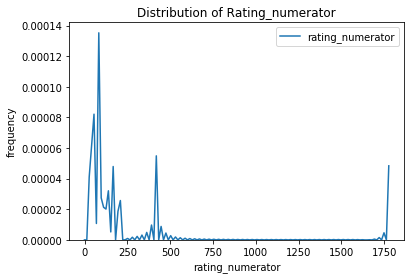

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.kdeplot(df.rating_numerator);
plt.xlabel('rating_numerator')
plt.ylabel('frequency')
plt.title('Distribution of Rating_numerator');

From the pic above, we can tell that most of 'rating_numerator' are less than 500. And some people prefer to give a extrem high rating, which is might because they like that dog so much.

In [62]:
print(np.mean(df['p1_conf']),np.mean(df['p2_conf']),np.mean(df['p3_conf']))

0.5945575081684427 0.13458502326540484 0.060165557796332286


We can see that picture one has the highest mean confidence compared to picture two's and picutre three's, which is might becasue people prefer to post a clear photo of his/ her cute dog at the very beginning.

In [63]:
df.p1.value_counts()

golden_retriever             137
Labrador_retriever            94
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
seat_belt                     21
miniature_pinscher            21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
beagle                        17
teddy                         17
Cardigan                      17
Italian_greyhound             16
Rottweiler                    16
Lakeland_terrier              15
kuvasz                        15
web_site                      14
          

We can tell from the above result that the most popular dog in all over the world is golden_retriever.